In [1]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
import shutil
import subprocess

In [2]:
"""
Create lidar and radar only data sets from the two samples.
"""

data_dir = 'data/'
output_dir = 'output/'

# run kalman filter on each sample dataset
for d in glob.glob(data_dir + "*"):
    
    # find filename and file extension
    fp = os.path.split(d)[-1]
    fn, fe = os.path.splitext(fp)
    
    # create output directory
    if not os.path.exists(output_dir):
        os.mkdir(output_dir)
    
    # generate output file path
    fp_out = output_dir + fn + '-output' + fe
    
    # run extended kalaman filter on datasets
    os.system('cmake-build-debug/ExtendedKF {} {}'.format(d, fp_out))

In [3]:
"""
Read output data into pandas dataframe.
"""

def read_output_file(output_file):
    column_names = ["est_px", "est_py", "est_vx", "est_vy", "meas_px", "meas_py", "gt_px", "gt_py", "gt_vx", "gt_vy"]
    return pd.read_table(output_file, names=column_names)

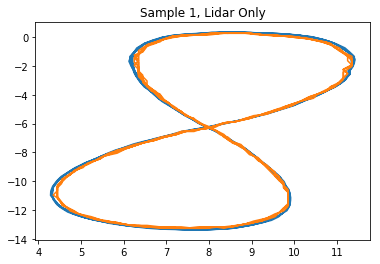

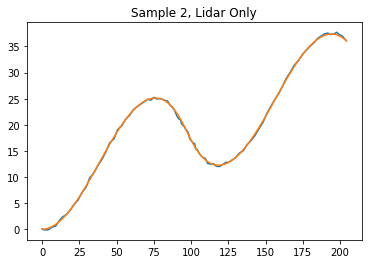

In [4]:
"""
Lidar only dataset
"""

lidar_1 = read_output_file('output/sample-laser-radar-measurement-data-1-lidar-output.txt')
lidar_2 = read_output_file('output/sample-laser-radar-measurement-data-2-lidar-output.txt')

plt.figure()
plt.title("Sample 1, Lidar Only")
plt.plot(lidar_1['est_px'], lidar_1['est_py'])
plt.plot(lidar_1['gt_px'], lidar_1['gt_py'])
plt.show()

plt.figure()
plt.title("Sample 2, Lidar Only")
plt.plot(lidar_2['est_px'], lidar_2['est_py'])
plt.plot(lidar_2['gt_px'], lidar_2['gt_py'])
plt.show()

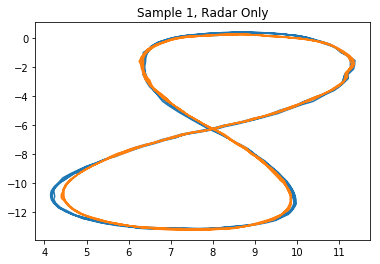

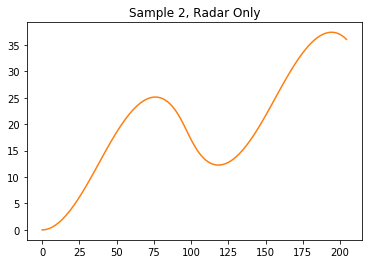

In [5]:
"""
Radar only dataset
"""

radar_1 = read_output_file('output/sample-laser-radar-measurement-data-1-radar-output.txt')
radar_2 = read_output_file('output/sample-laser-radar-measurement-data-2-radar-output.txt')

plt.figure()
plt.title("Sample 1, Radar Only")
plt.plot(radar_1['est_px'], radar_1['est_py'])
plt.plot(radar_1['gt_px'], radar_1['gt_py'])
plt.show()

plt.figure()
plt.title("Sample 2, Radar Only")
plt.plot(radar_2['est_px'], radar_2['est_py'])
plt.plot(radar_2['gt_px'], radar_2['gt_py'])
plt.show()

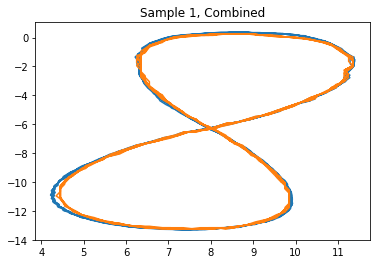

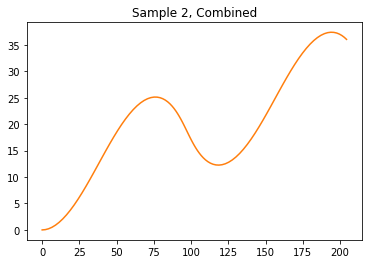

In [7]:
combined_1 = read_output_file('output/sample-laser-radar-measurement-data-1-output.txt')
combined_2 = read_output_file('output/sample-laser-radar-measurement-data-2-output.txt')

plt.figure()
plt.title("Sample 1, Combined")
plt.plot(combined_1['est_px'], combined_1['est_py'])
plt.plot(combined_1['gt_px'], combined_1['gt_py'])
plt.show()

plt.figure()
plt.title("Sample 2, Combined")
plt.plot(combined_2['est_px'], combined_2['est_py'])
plt.plot(combined_2['gt_px'], combined_2['gt_py'])
plt.show()

In [40]:
import numpy as np

def rmse(data):
    # number of measurements
    n = data.shape[0]
    
    # convert estimates and ground truth to arrays
    e = data[['est_px', 'est_py', 'est_vx', 'est_vy']].as_matrix()
    g = data[['gt_px', 'gt_py', 'gt_vx', 'gt_vy']].as_matrix()
    
    # sum of square of residuals
    residuals = np.sum(np.power(e-g,2), axis=0)
    
    # return RMSE
    return np.sqrt(residuals/n)

print("Lidar Only RMSE: {}".format(rmse(lidar_1)))
print("Radar Only RMSE: {}".format(rmse(radar_1)))
print("Combined RMSE: {}".format(rmse(combined_1)))

Lidar Only RMSE: [ 0.06960322  0.05887649  0.64545368  0.56982642]
Radar Only RMSE: [ 0.10253598  0.08296112  0.60611643  0.59011248]
Combined RMSE: [ 0.06516498  0.06053766  0.53321151  0.54419271]


In [33]:
d.shape

(1224, 10)